**Dataset:** [zenodo.org/records/2867216](https://zenodo.org/records/2867216)
**Validation Code:**  [github.com/aeesha-T/parkinsons_prediction_using_speech](https://github.com/aeesha-T/parkinsons_prediction_using_speech)

In [2]:
import feature_calculation.build_biomarker_csv as build_biomarker_csv
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


In [ ]:
# Build the csv files
build_biomarker_csv.build_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Eng.csv", audio_dir="./MDVR-KCL/ReadText/PD-Eng")
build_biomarker_csv.build_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Eng.csv", audio_dir="./MDVR-KCL/ReadText/HC-Eng")
build_biomarker_csv.build_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Sun.csv", audio_dir="./MDVR-KCL/ReadText/PD-Sun")
build_biomarker_csv.build_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Sun.csv", audio_dir="./MDVR-KCL/ReadText/HC-Sun")

Processing ID02_pd_2_0_0.wav...
Text data saved to ./MDVR-KCL/ReadText/Text Files
Preprocessed audio saved to ./MDVR-KCL/ReadText/PD-Eng/ID02_pd_2_0_0_preprocessed.wav
Alignment_Path:  ./MDVR-KCL/ReadText/Alignment Files/ID02_pd_2_0_0_preprocessed.json
Alignment data saved to ./MDVR-KCL/ReadText/Alignment Files
Processing ID04_pd_2_0_1.wav...
Text data saved to ./MDVR-KCL/ReadText/Text Files
Preprocessed audio saved to ./MDVR-KCL/ReadText/PD-Eng/ID04_pd_2_0_1_preprocessed.wav
Alignment_Path:  ./MDVR-KCL/ReadText/Alignment Files/ID04_pd_2_0_1_preprocessed.json
Alignment data saved to ./MDVR-KCL/ReadText/Alignment Files
Metrics saved to MDVR-KCL-ReadTextPD-Eng.csv
Processing ID01_hc_0_0_0.wav...
Text data saved to ./MDVR-KCL/ReadText/Text Files
Preprocessed audio saved to ./MDVR-KCL/ReadText/HC-Eng/ID01_hc_0_0_0_preprocessed.wav
Alignment_Path:  ./MDVR-KCL/ReadText/Alignment Files/ID01_hc_0_0_0_preprocessed.json
Alignment data saved to ./MDVR-KCL/ReadText/Alignment Files
Processing ID14_

In [3]:
# Load the data/sorted
pd_eng = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Eng.csv", index_col="filename").sort_index()
hc_eng = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Eng.csv", index_col="filename").sort_index()
pd_sun = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Sun.csv", index_col="filename").sort_index()
hc_sun = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Sun.csv", index_col="filename").sort_index()

In [ ]:
# Acoustic features generated per (https://arxiv.org/abs/2111.10207) on MVDR
full_validation_set = pd.read_csv("./Validation Files/MDVR_KCL_reading_acoustic_features.csv")
pd_eng_validation = full_validation_set[full_validation_set["voiceID"].str.contains("PD-Eng") & full_validation_set["voiceID"].str.contains("preprocessed")]
hc_eng_validation = full_validation_set[full_validation_set["voiceID"].str.contains("HC-Eng") & full_validation_set["voiceID"].str.contains("preprocessed")]
pd_sun_validation = full_validation_set[full_validation_set["voiceID"].str.contains("PD-Sun") & full_validation_set["voiceID"].str.contains("preprocessed")]
hc_sun_validation = full_validation_set[full_validation_set["voiceID"].str.contains("HC-Sun") & full_validation_set["voiceID"].str.contains("preprocessed")]
# Rename columns properly to match the sets of features
renaming = {
    "meanF0Hz": "ff_mean",
    "stdevF0Hz": "ff_std",
    "HNR": "harm_mean",
    "localJitter": "jitter_local",
    "localabsoluteJitter": "jitter_local_db",
    "rapJitter": "jitter_rap",
    "ppq5Jitter": "jitter_ppq5",
    "localShimmer": "shimmer_local",
    "localdbShimmer": "shimmer_local_db",
    "apq3Shimmer": "shimmer_apq3",
    "apq5Shimmer": "shimmer_apq5",

}
# Reformat columns and sort both dataframes to be same order
for df in [pd_eng_validation, hc_eng_validation, pd_sun_validation, hc_sun_validation]:
    df["voiceID"] = df["voiceID"].str.split("/").str[-1].str.replace("_preprocessed", "").str.replace(".wav", "")
    df.set_index("voiceID", inplace=True)
    df.sort_index(inplace=True)
    df.rename(columns=renaming, inplace=True)
    df.drop(columns=df.columns.difference(["ff_mean", "ff_std", "harm_mean", "jitter_local", "jitter_local_db", "jitter_rap", "jitter_ppq5", "shimmer_local", "shimmer_local_db", "shimmer_apq3", "shimmer_apq5"]), inplace=True)
for df in [pd_eng, hc_eng, pd_sun, hc_sun]:
    df.drop(columns=df.columns.difference(["ff_mean", "ff_std", "harm_mean", "jitter_local", "jitter_local_db", "jitter_rap", "jitter_ppq5", "shimmer_local", "shimmer_local_db", "shimmer_apq3", "shimmer_apq5"]), inplace=True)

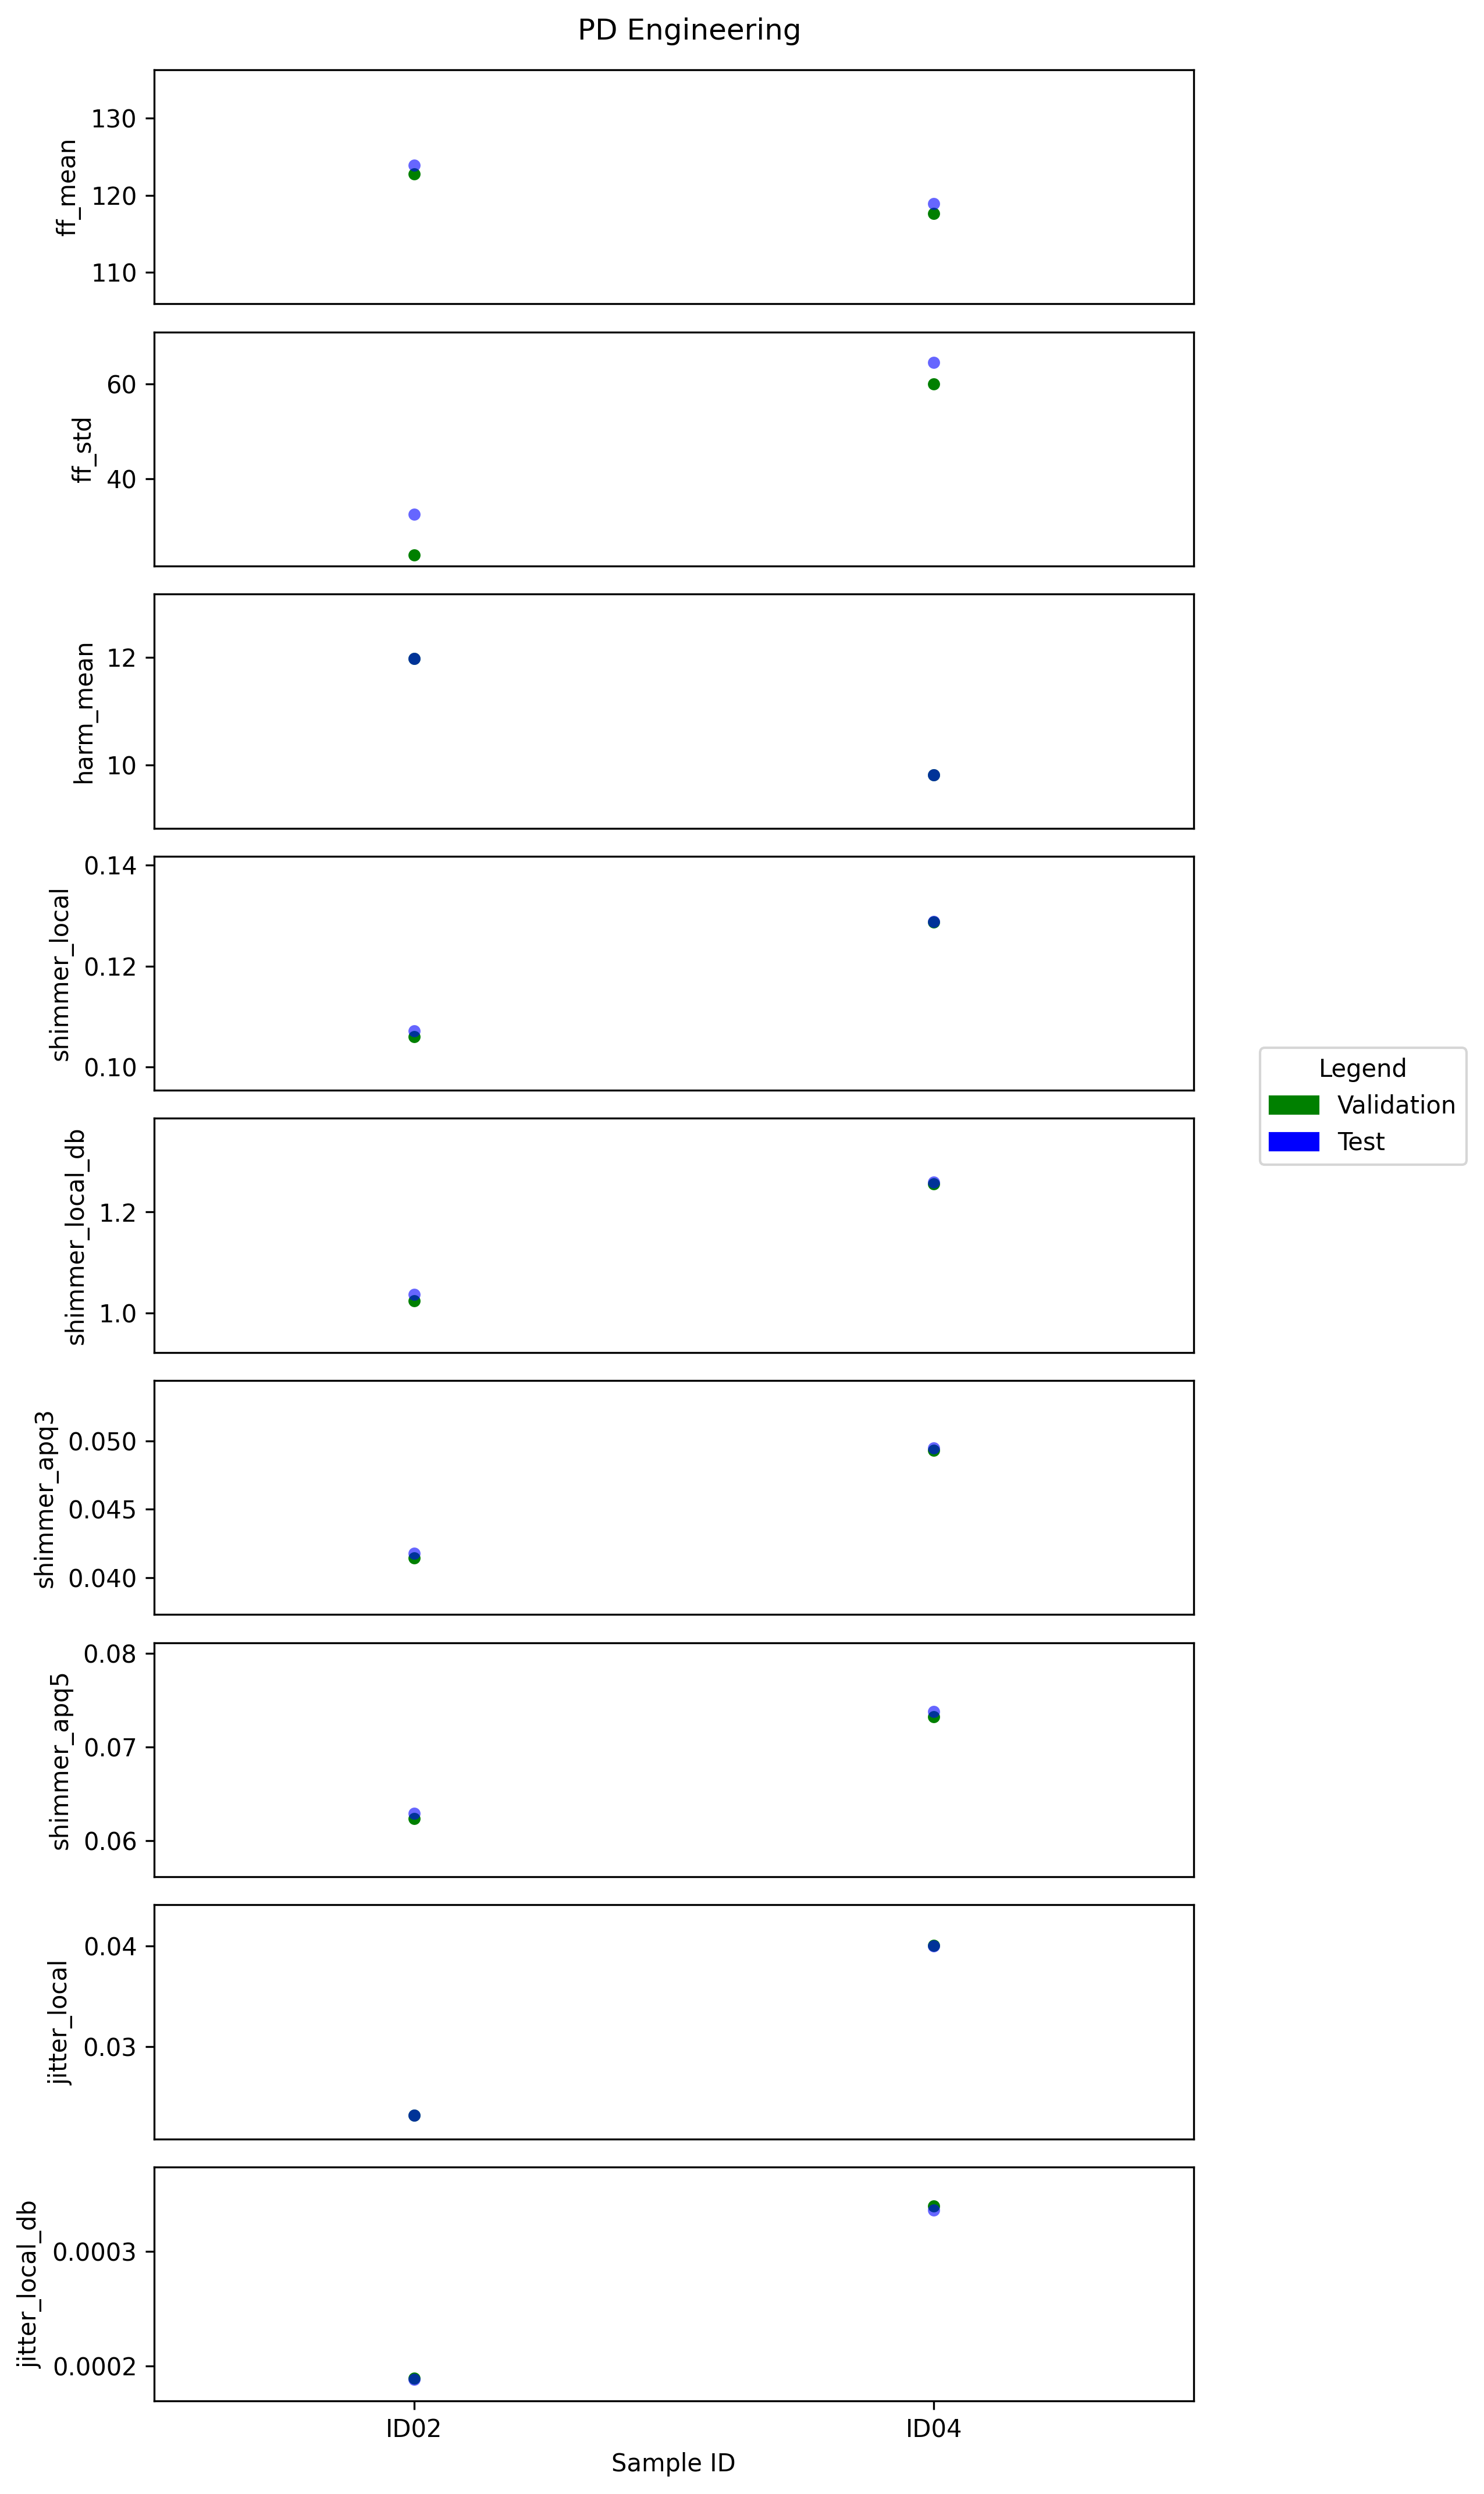

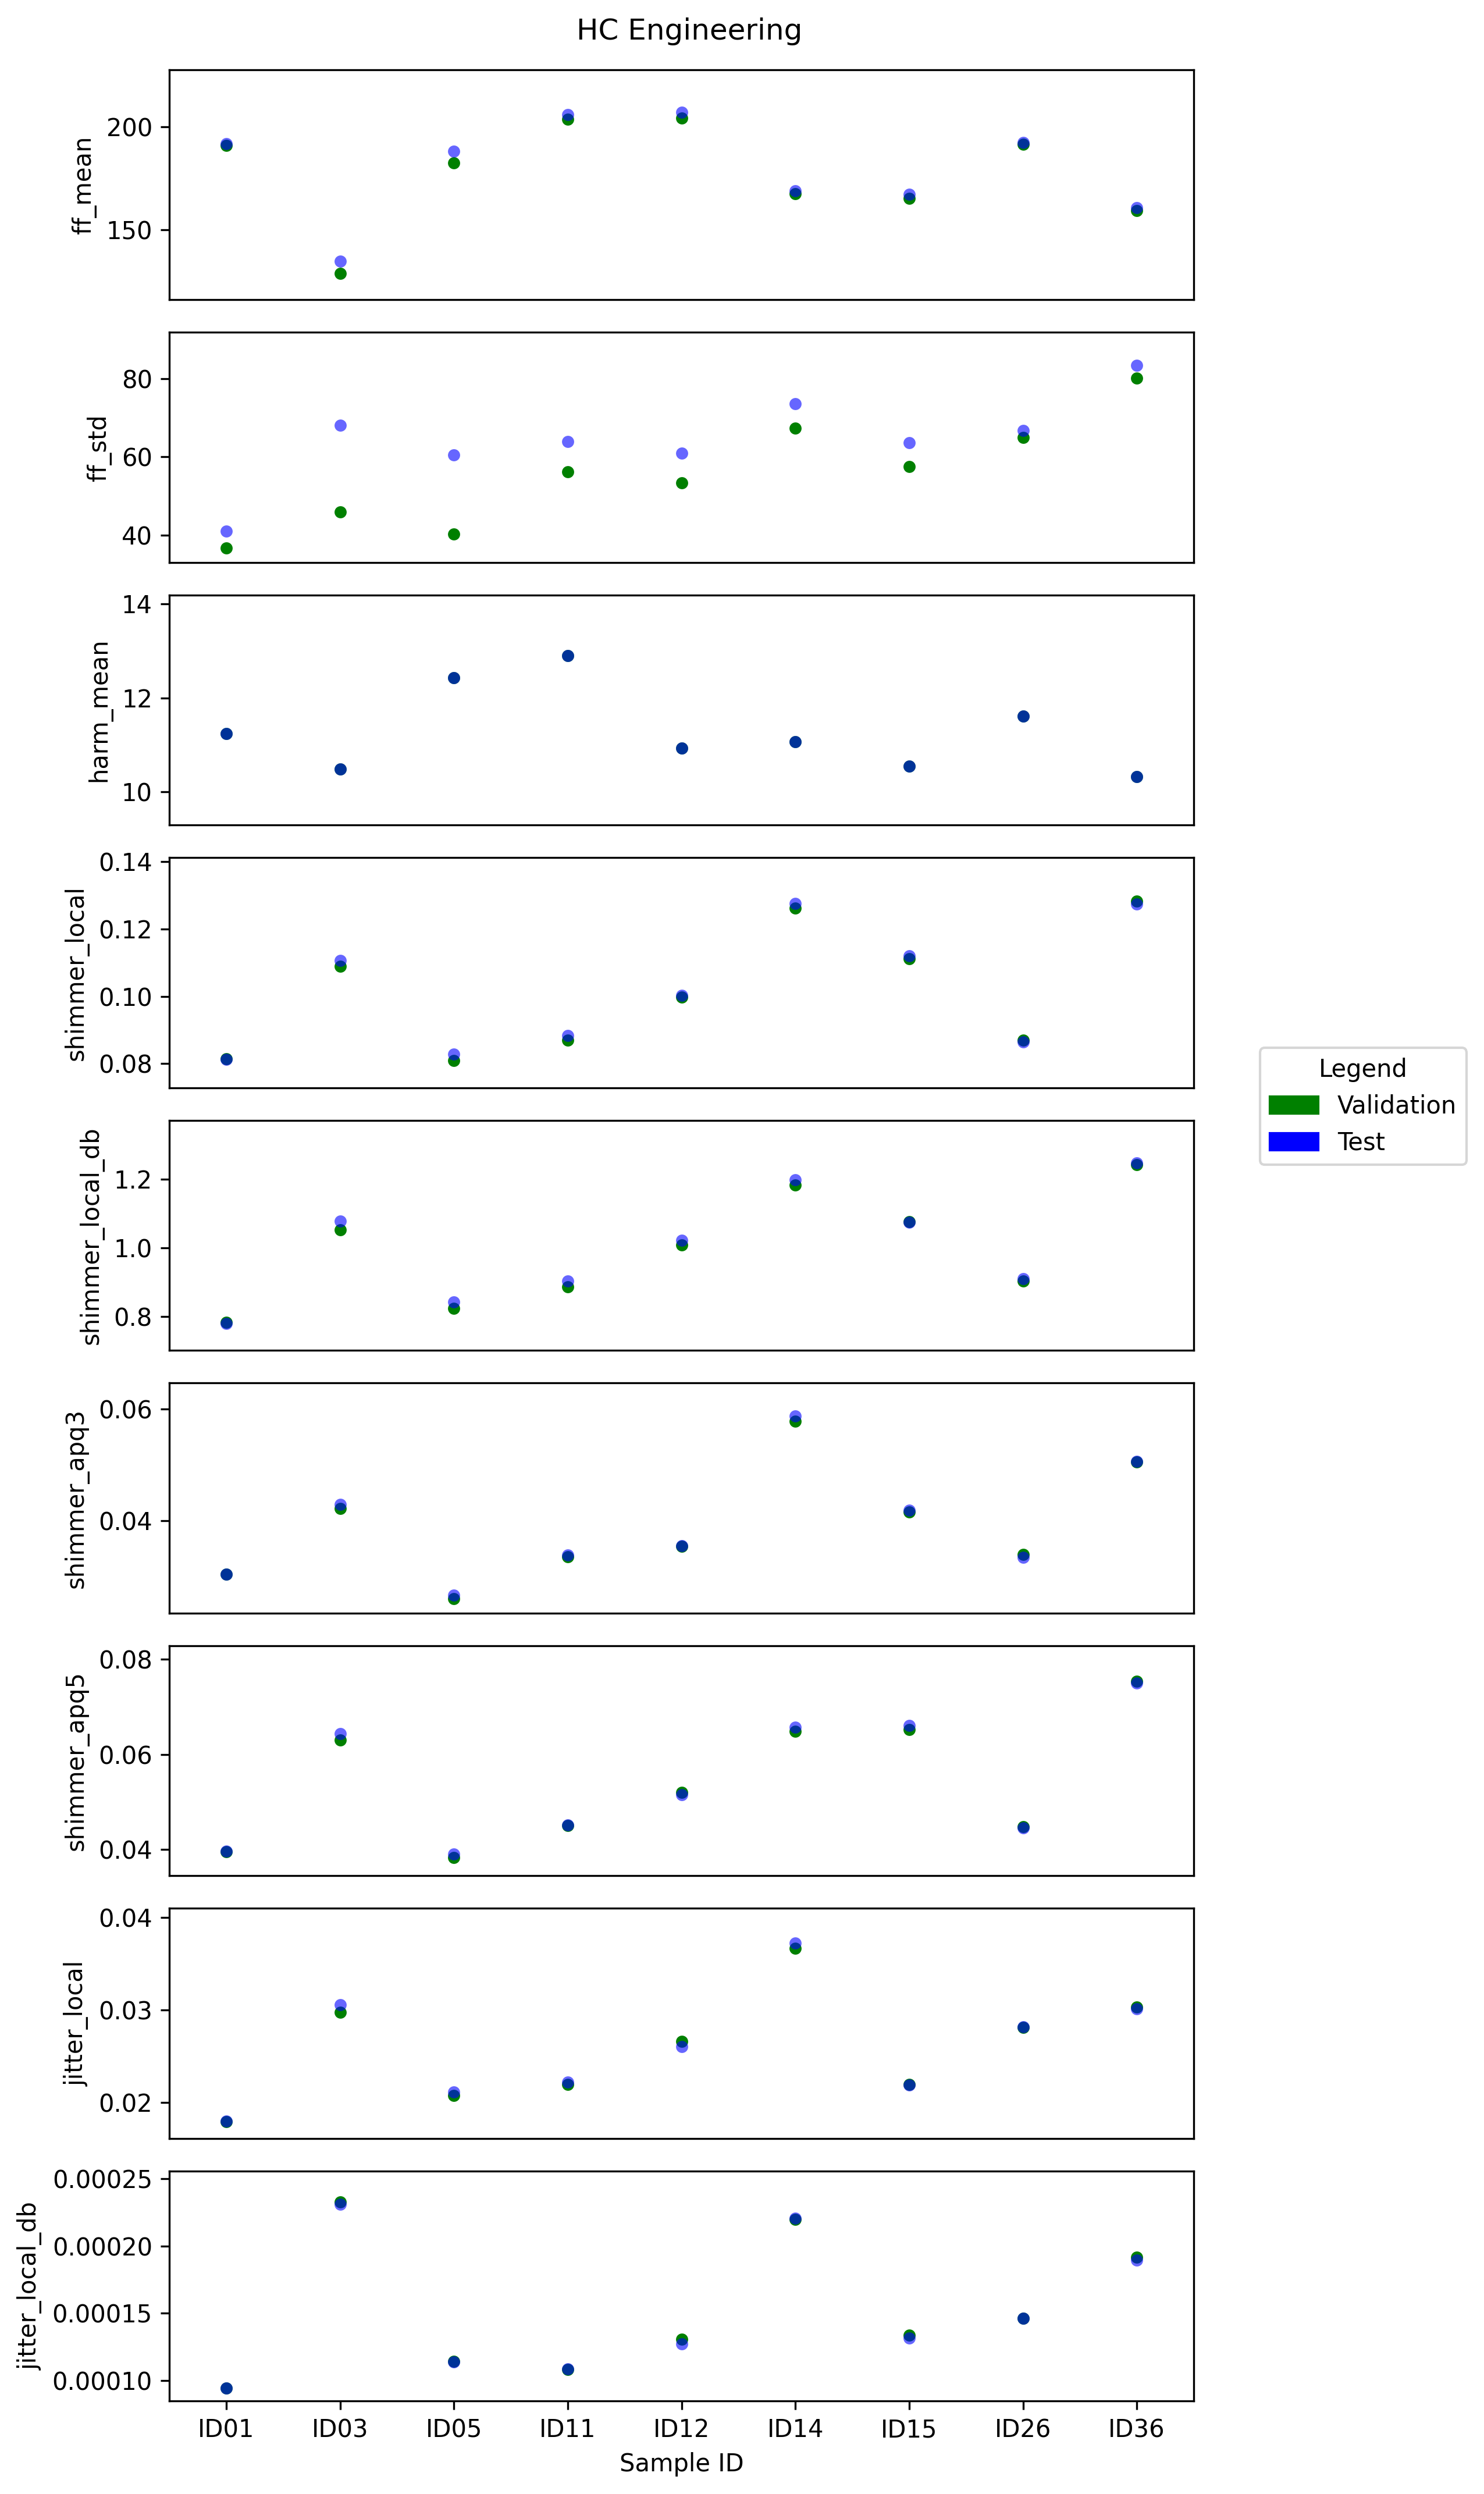

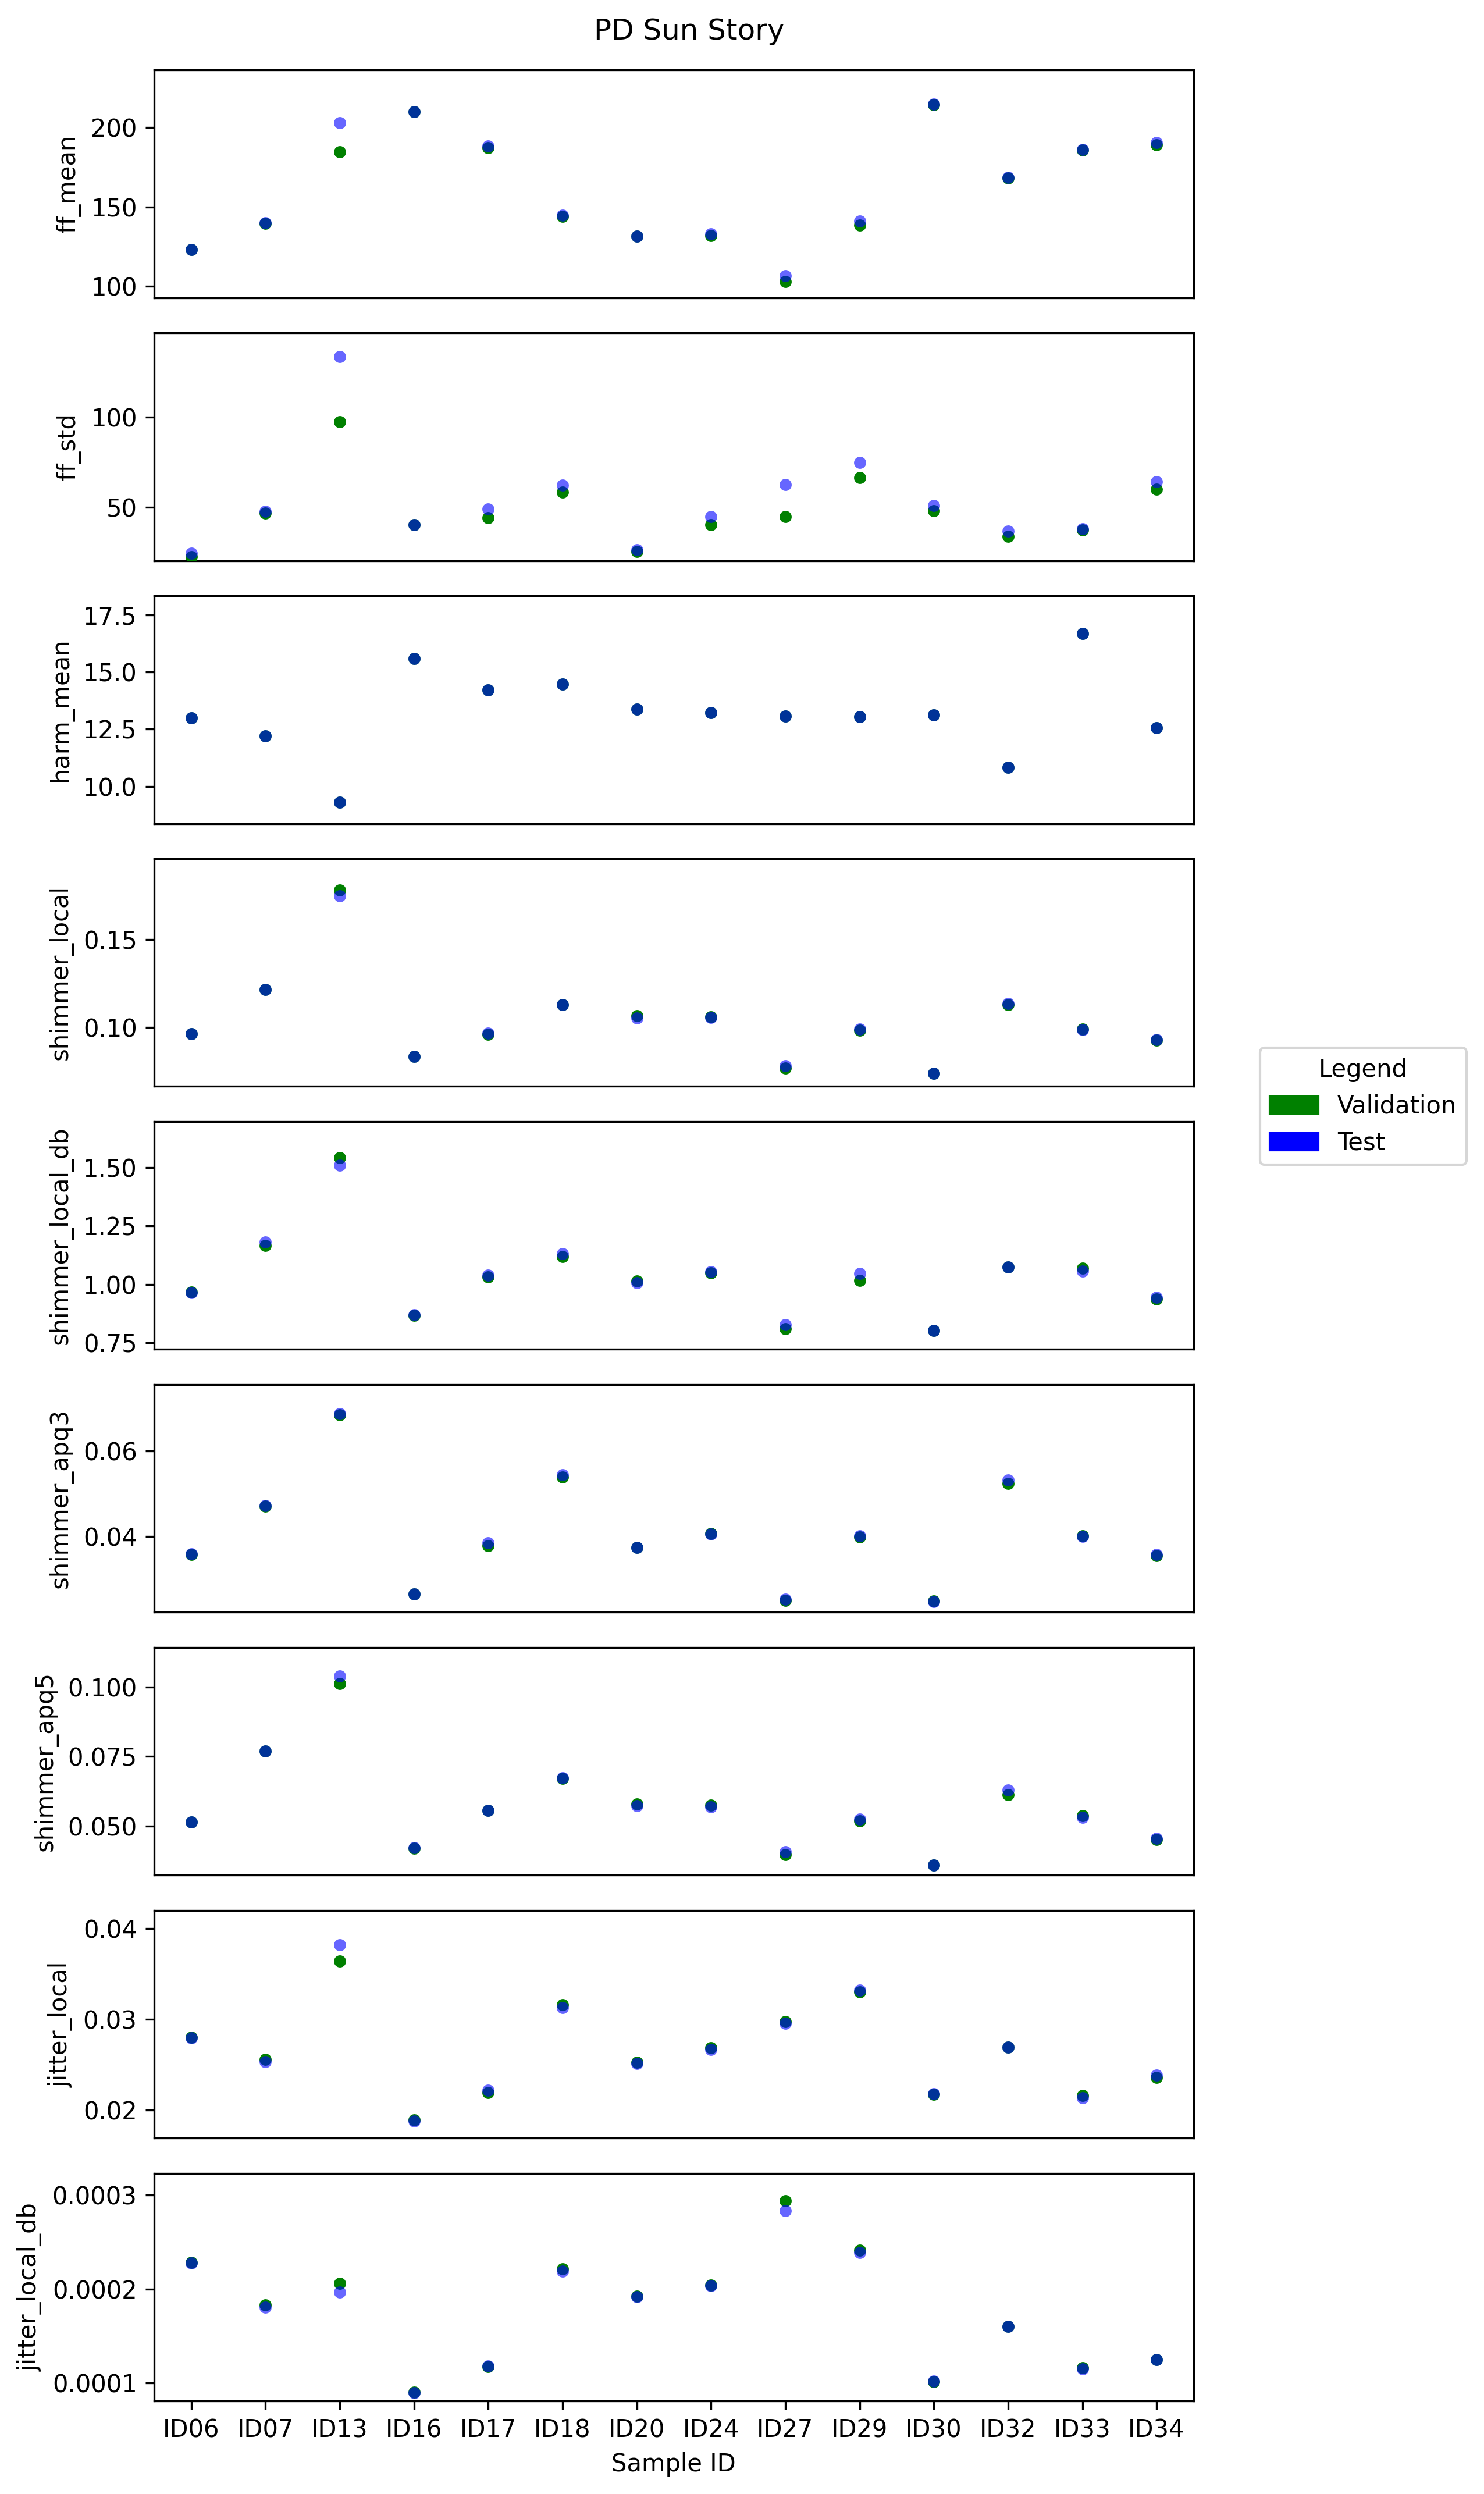

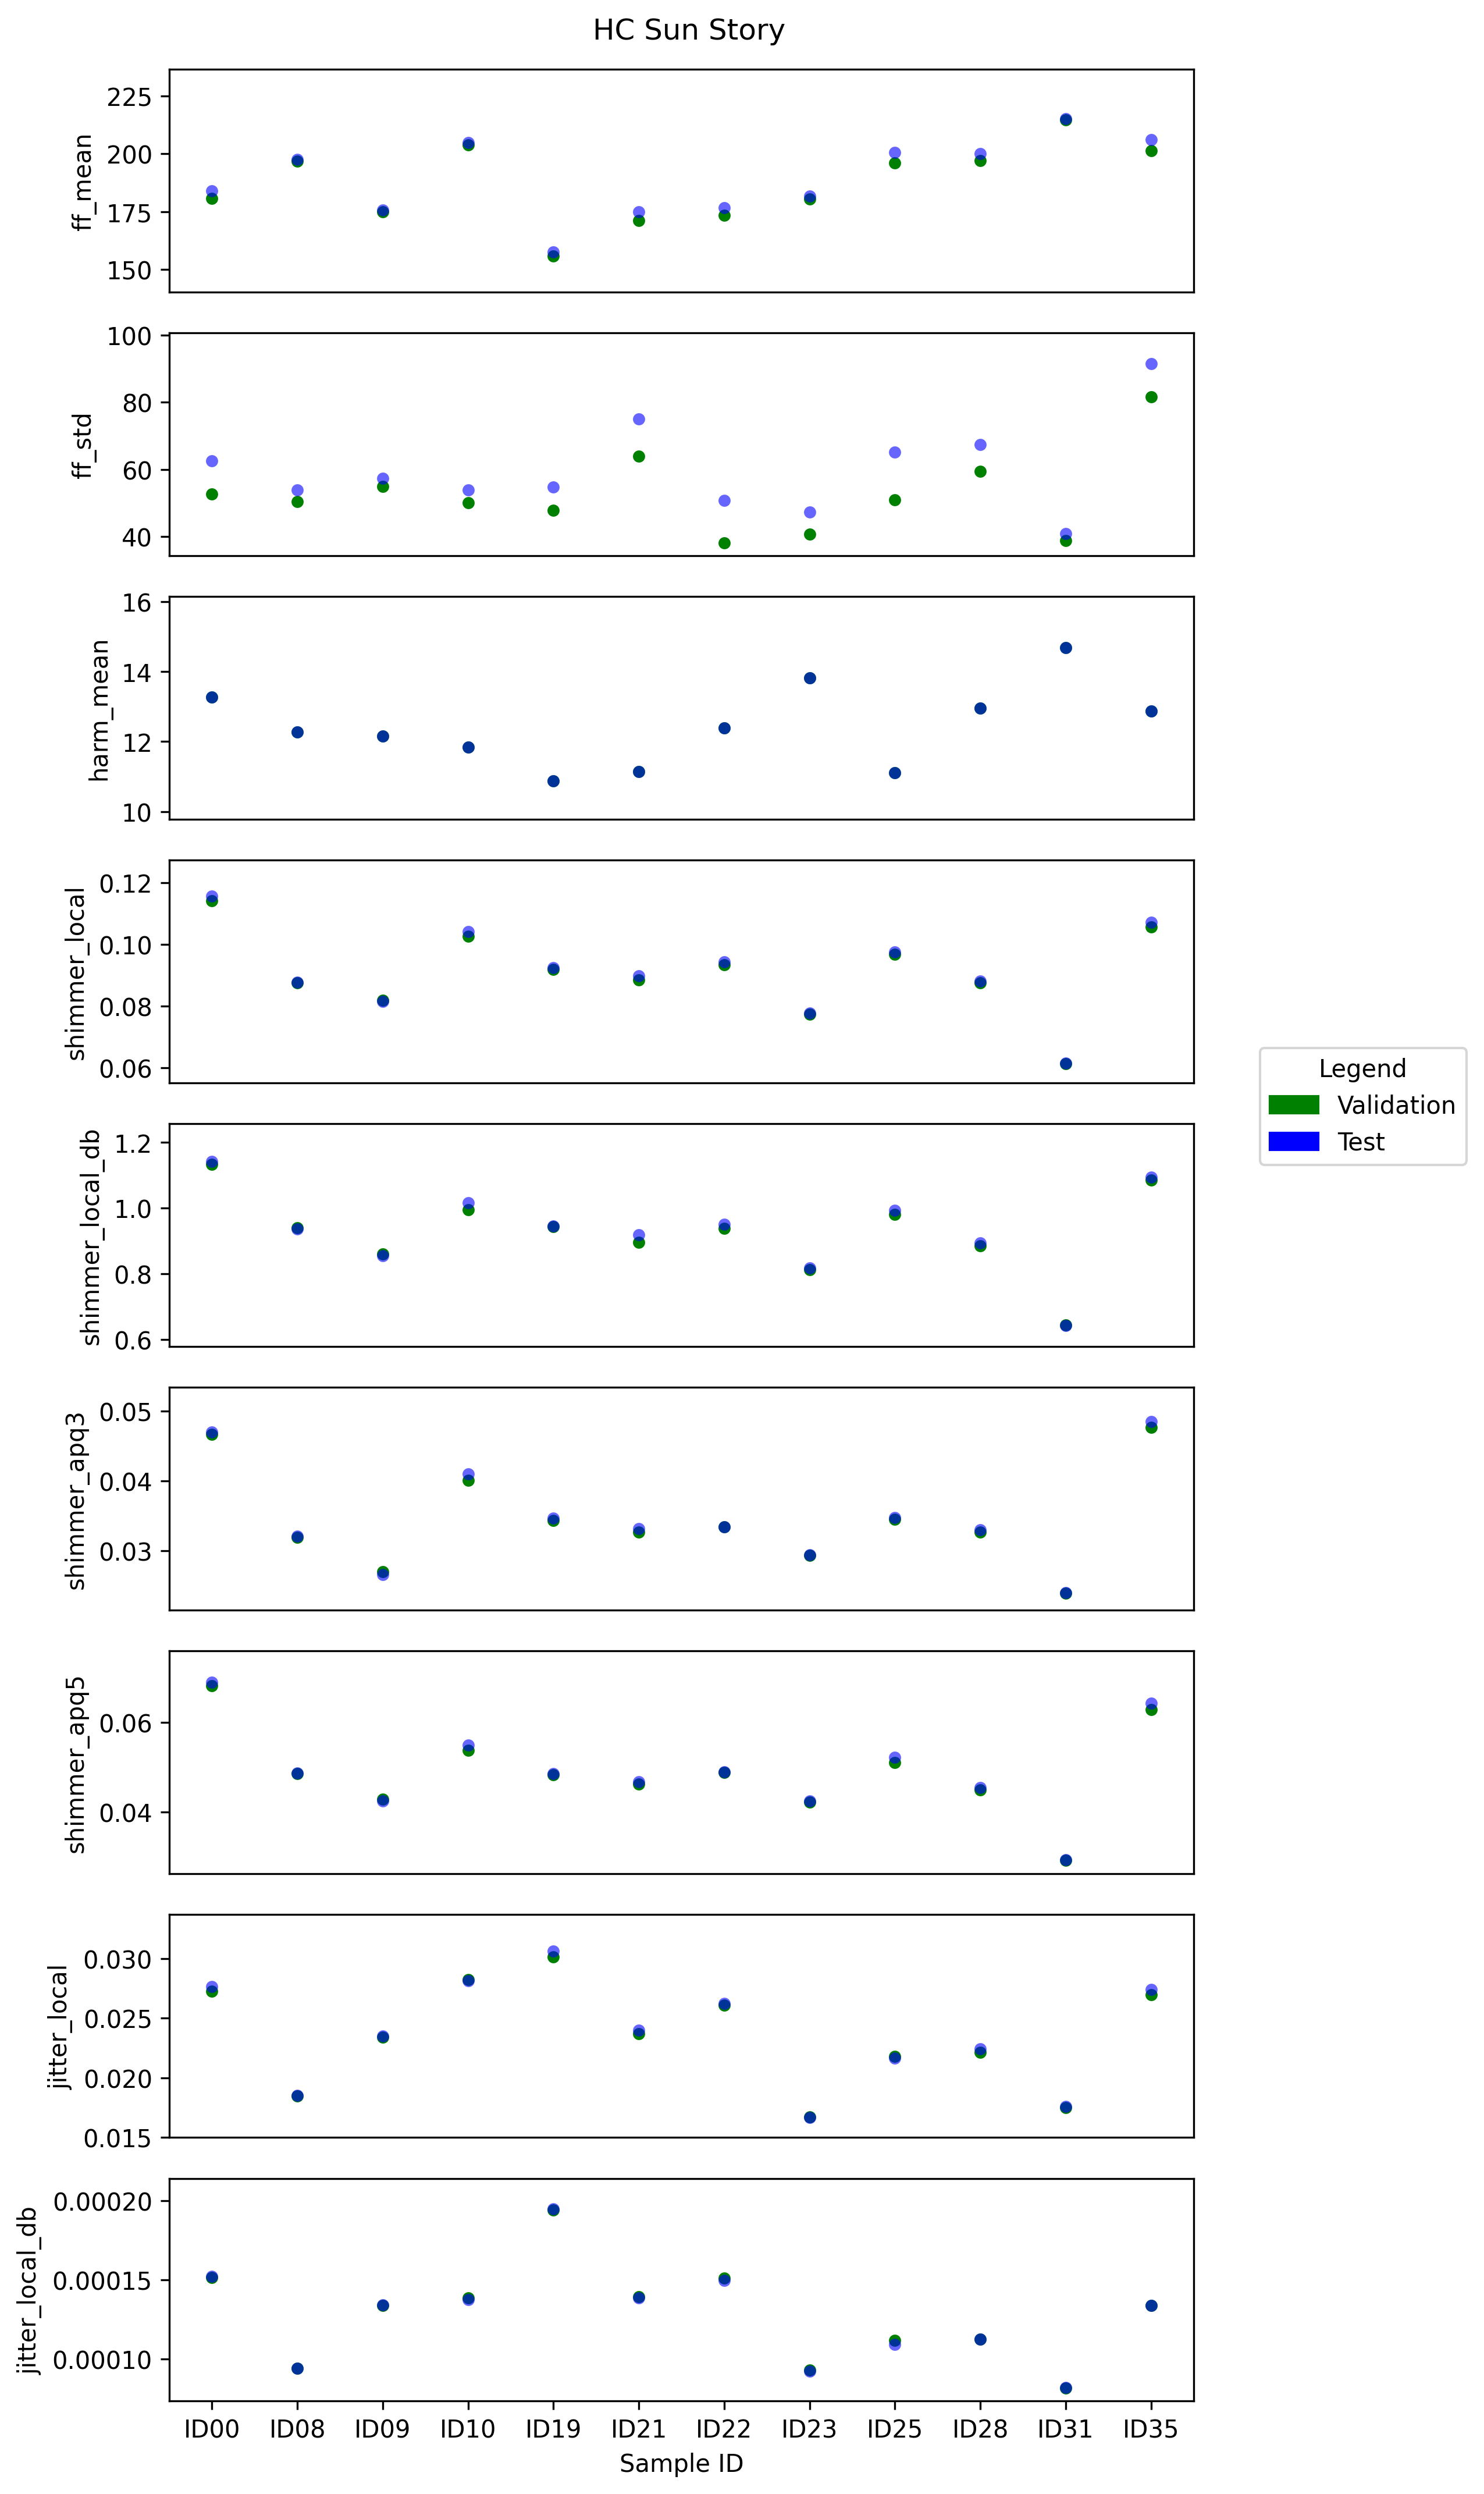

In [ ]:
triples = [(pd_eng, pd_eng_validation, 'PD Engineering'), 
         (hc_eng, hc_eng_validation, 'HC Engineering'), 
         (pd_sun, pd_sun_validation, 'PD Sun Story'), 
         (hc_sun, hc_sun_validation, 'HC Sun Story')]
def plot_validation_metrics(test, validation, title):
    # Create a figure with subplots
    f, axs = plt.subplots(len(test.columns), 1, figsize=(8, 16))
    # Iterate over each column and create a strip plot
    for i, col in enumerate(test.columns):
        upper_lim = max(test[col].max(), validation[col].max()) * 1.1
        lower_lim = min(test[col].min(), validation[col].min()) * 0.9
        # Plot validation data
        sns.stripplot(data=validation, x=validation.index.str.split('_').str[0], y=col, ax=axs[i], color='green')
        # Plot test data
        sns.stripplot(data=test, x=test.index.str.split('_').str[0], y=col, ax=axs[i], color='blue', alpha=0.6)
        # Remove x-labels for all but the last subplot
        if i != len(test.columns) - 1:
            axs[i].set_xlabel('')
            axs[i].set(xticks=[])
        else:
            axs[i].set_xlabel("Sample ID")
        axs[i].set_ylim(lower_lim, upper_lim)

    # Create custom legend handles
    blue_patch = mpatches.Patch(color='blue', label='Test')
    green_patch = mpatches.Patch(color='green', label='Validation')

    # Add legend to the right
    f.legend(handles=[green_patch, blue_patch], 
         loc='center left', 
         bbox_to_anchor=(0.9, 0.5),  # Move legend closer to the right
         title='Legend')

    # Move the suptitle up to create margin above the first plot
    f.suptitle(title, y = 0.89)  # y > 1 moves the title up

    f.tight_layout(rect=[0, 0, 0.88, 0.9])  # Leave space at top for title, right for legend
    f.savefig(f"./Validation Files/Plots/MDVR-KCL_{title}_validation.png", bbox_inches='tight', dpi=300)
    return f
for triple in triples:
    plot = plot_validation_metrics(triple[0], triple[1], triple[2])

**Data Exploration Experiments**

In [49]:
from sklearn.decomposition import PCA, KernelPCA
import numpy as np

In [41]:
# Load the data/sorted
MDVR_pd_eng = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Eng.csv", index_col="filename").sort_index()
MDVR_pd_sun = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD-Sun.csv", index_col="filename").sort_index()
MDVR_hc_eng = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Eng.csv", index_col="filename").sort_index()
MDVR_hc_sun = pd.read_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC-Sun.csv", index_col="filename").sort_index()
df_list = [MDVR_pd_eng, MDVR_pd_sun, MDVR_hc_eng, MDVR_hc_sun]
merged_df = pd.concat(df_list)
merged_df.to_csv("./MDVR-KCL-Features/MDVR-KCL-ReadText.csv")
pd_only = pd.concat([MDVR_pd_eng, MDVR_pd_sun])
hc_only = pd.concat([MDVR_hc_eng, MDVR_hc_sun])
pd_only.to_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextPD.csv")
hc_only.to_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextHC.csv")
eng_only = pd.concat([MDVR_pd_eng, MDVR_hc_eng])
sun_only = pd.concat([MDVR_pd_sun, MDVR_hc_sun])
eng_only.to_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextEng.csv")
sun_only.to_csv("./MDVR-KCL-Features/MDVR-KCL-ReadTextSun.csv")


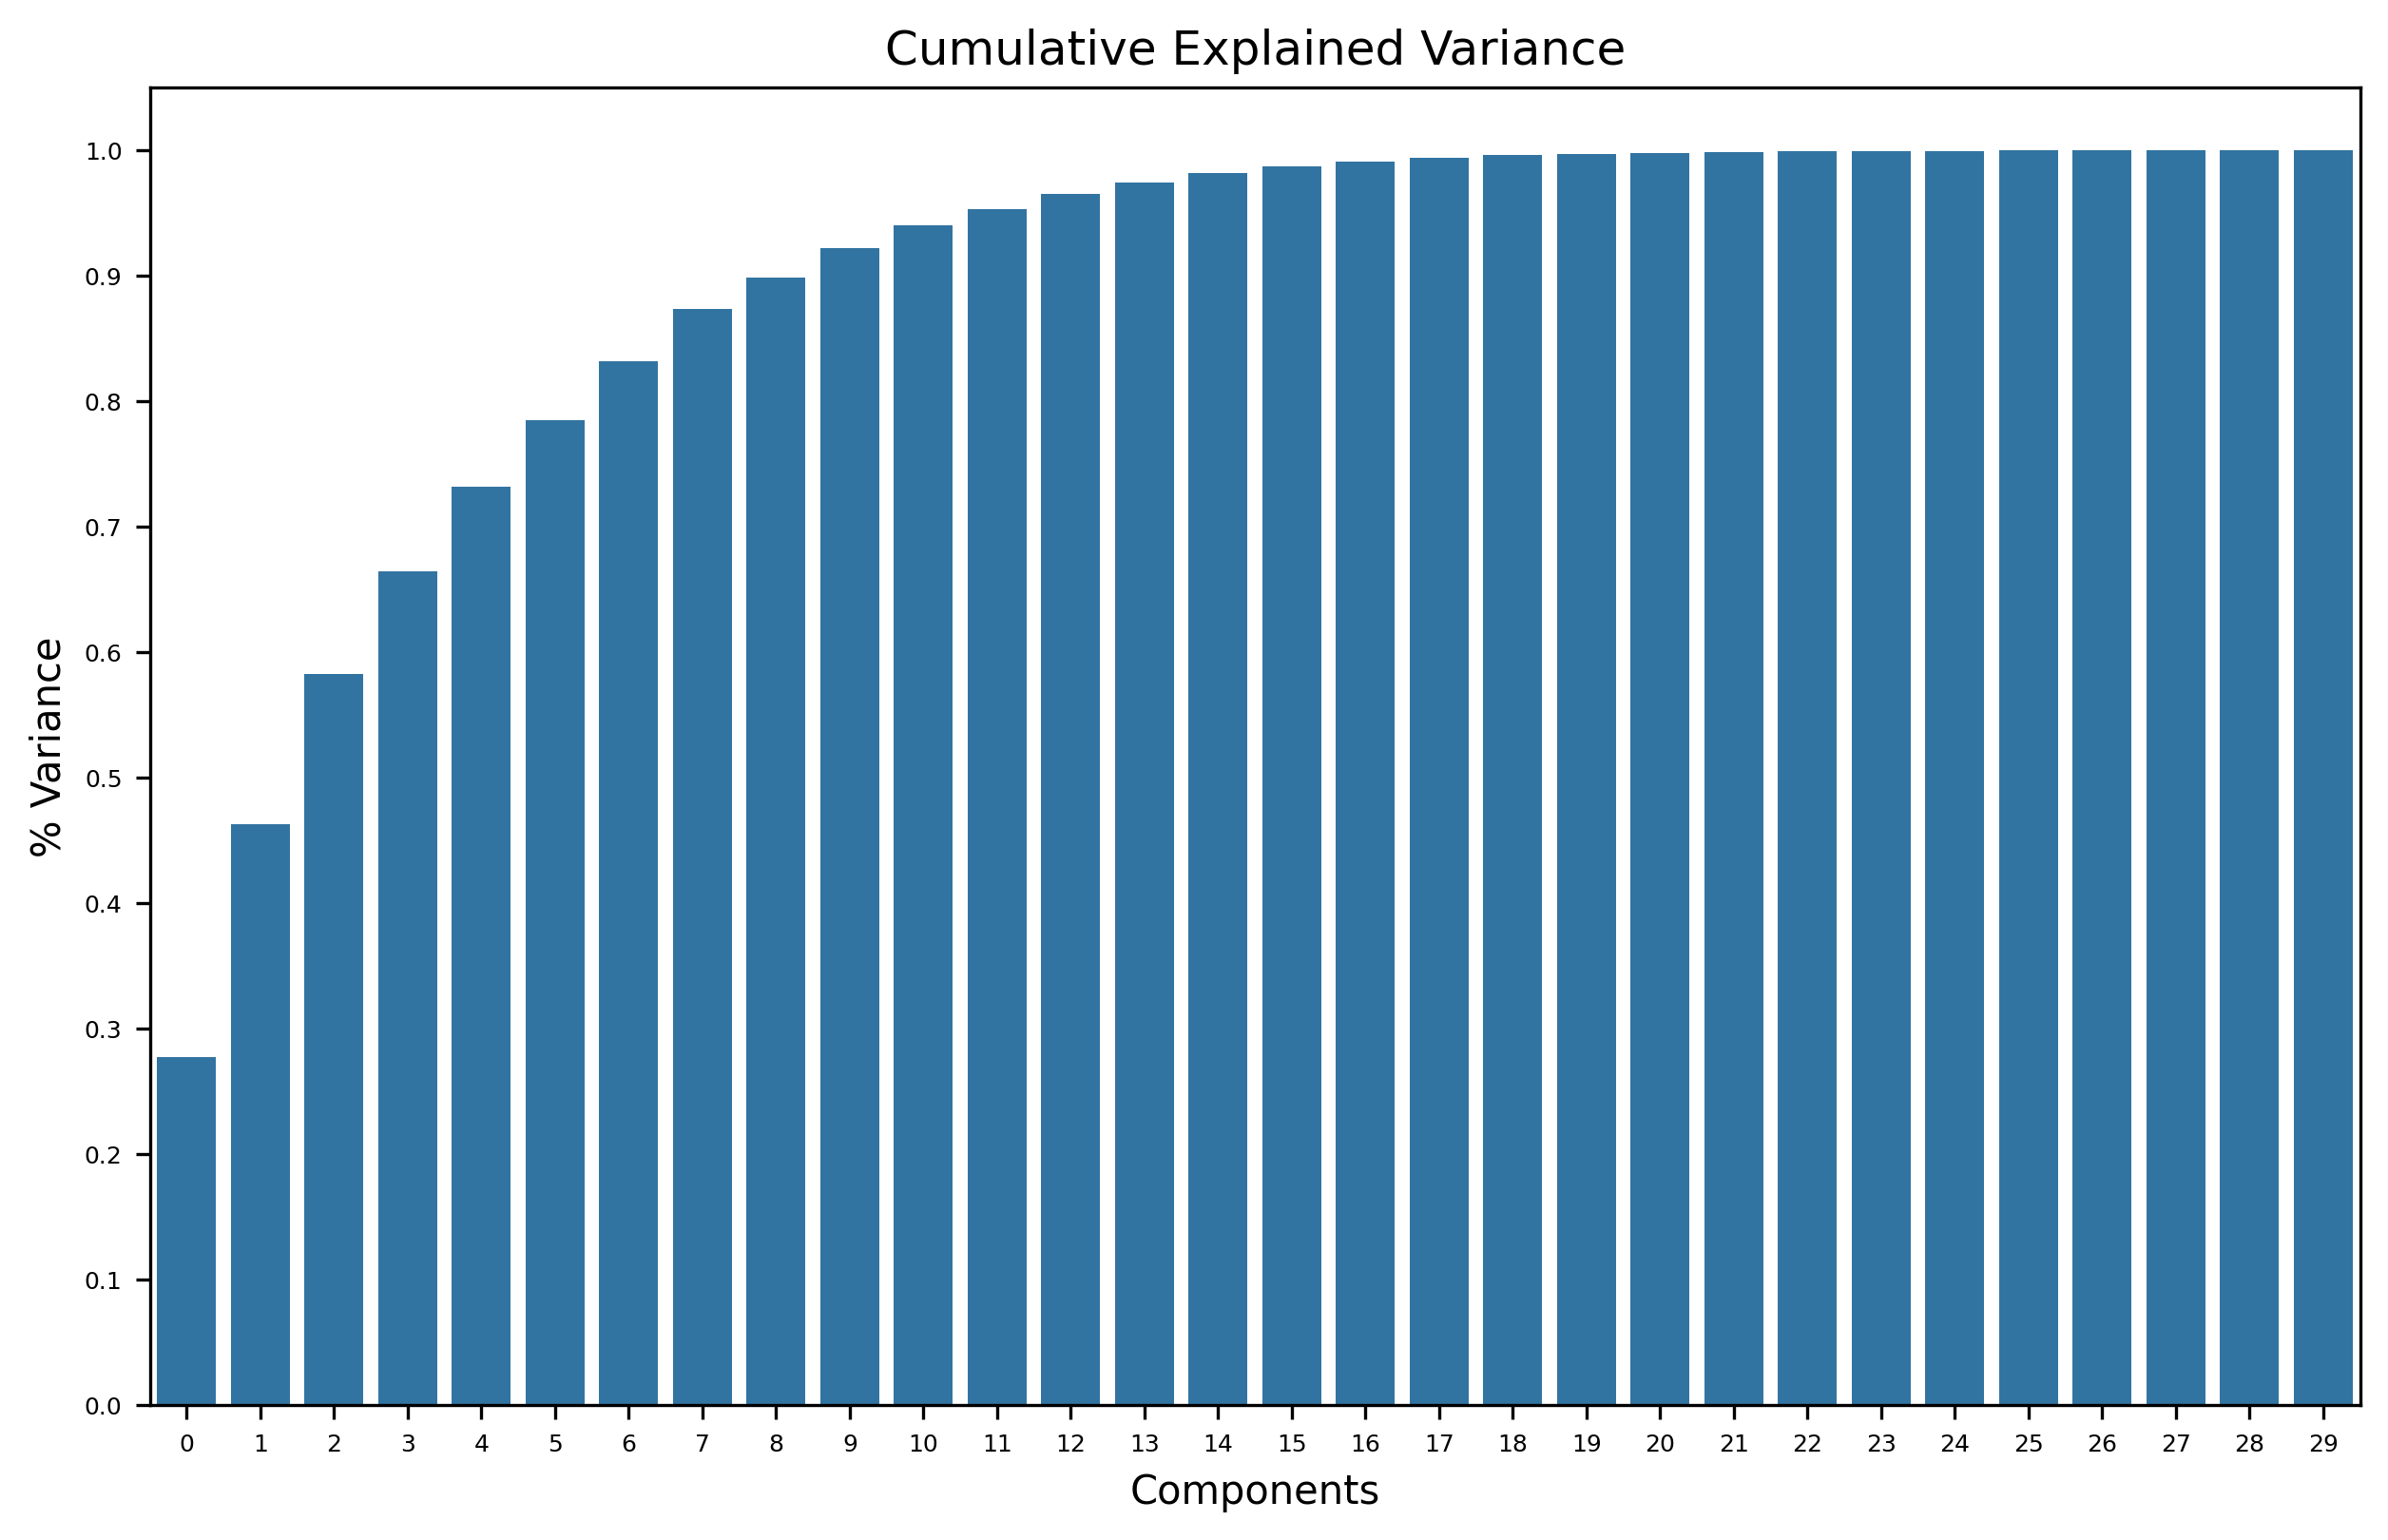

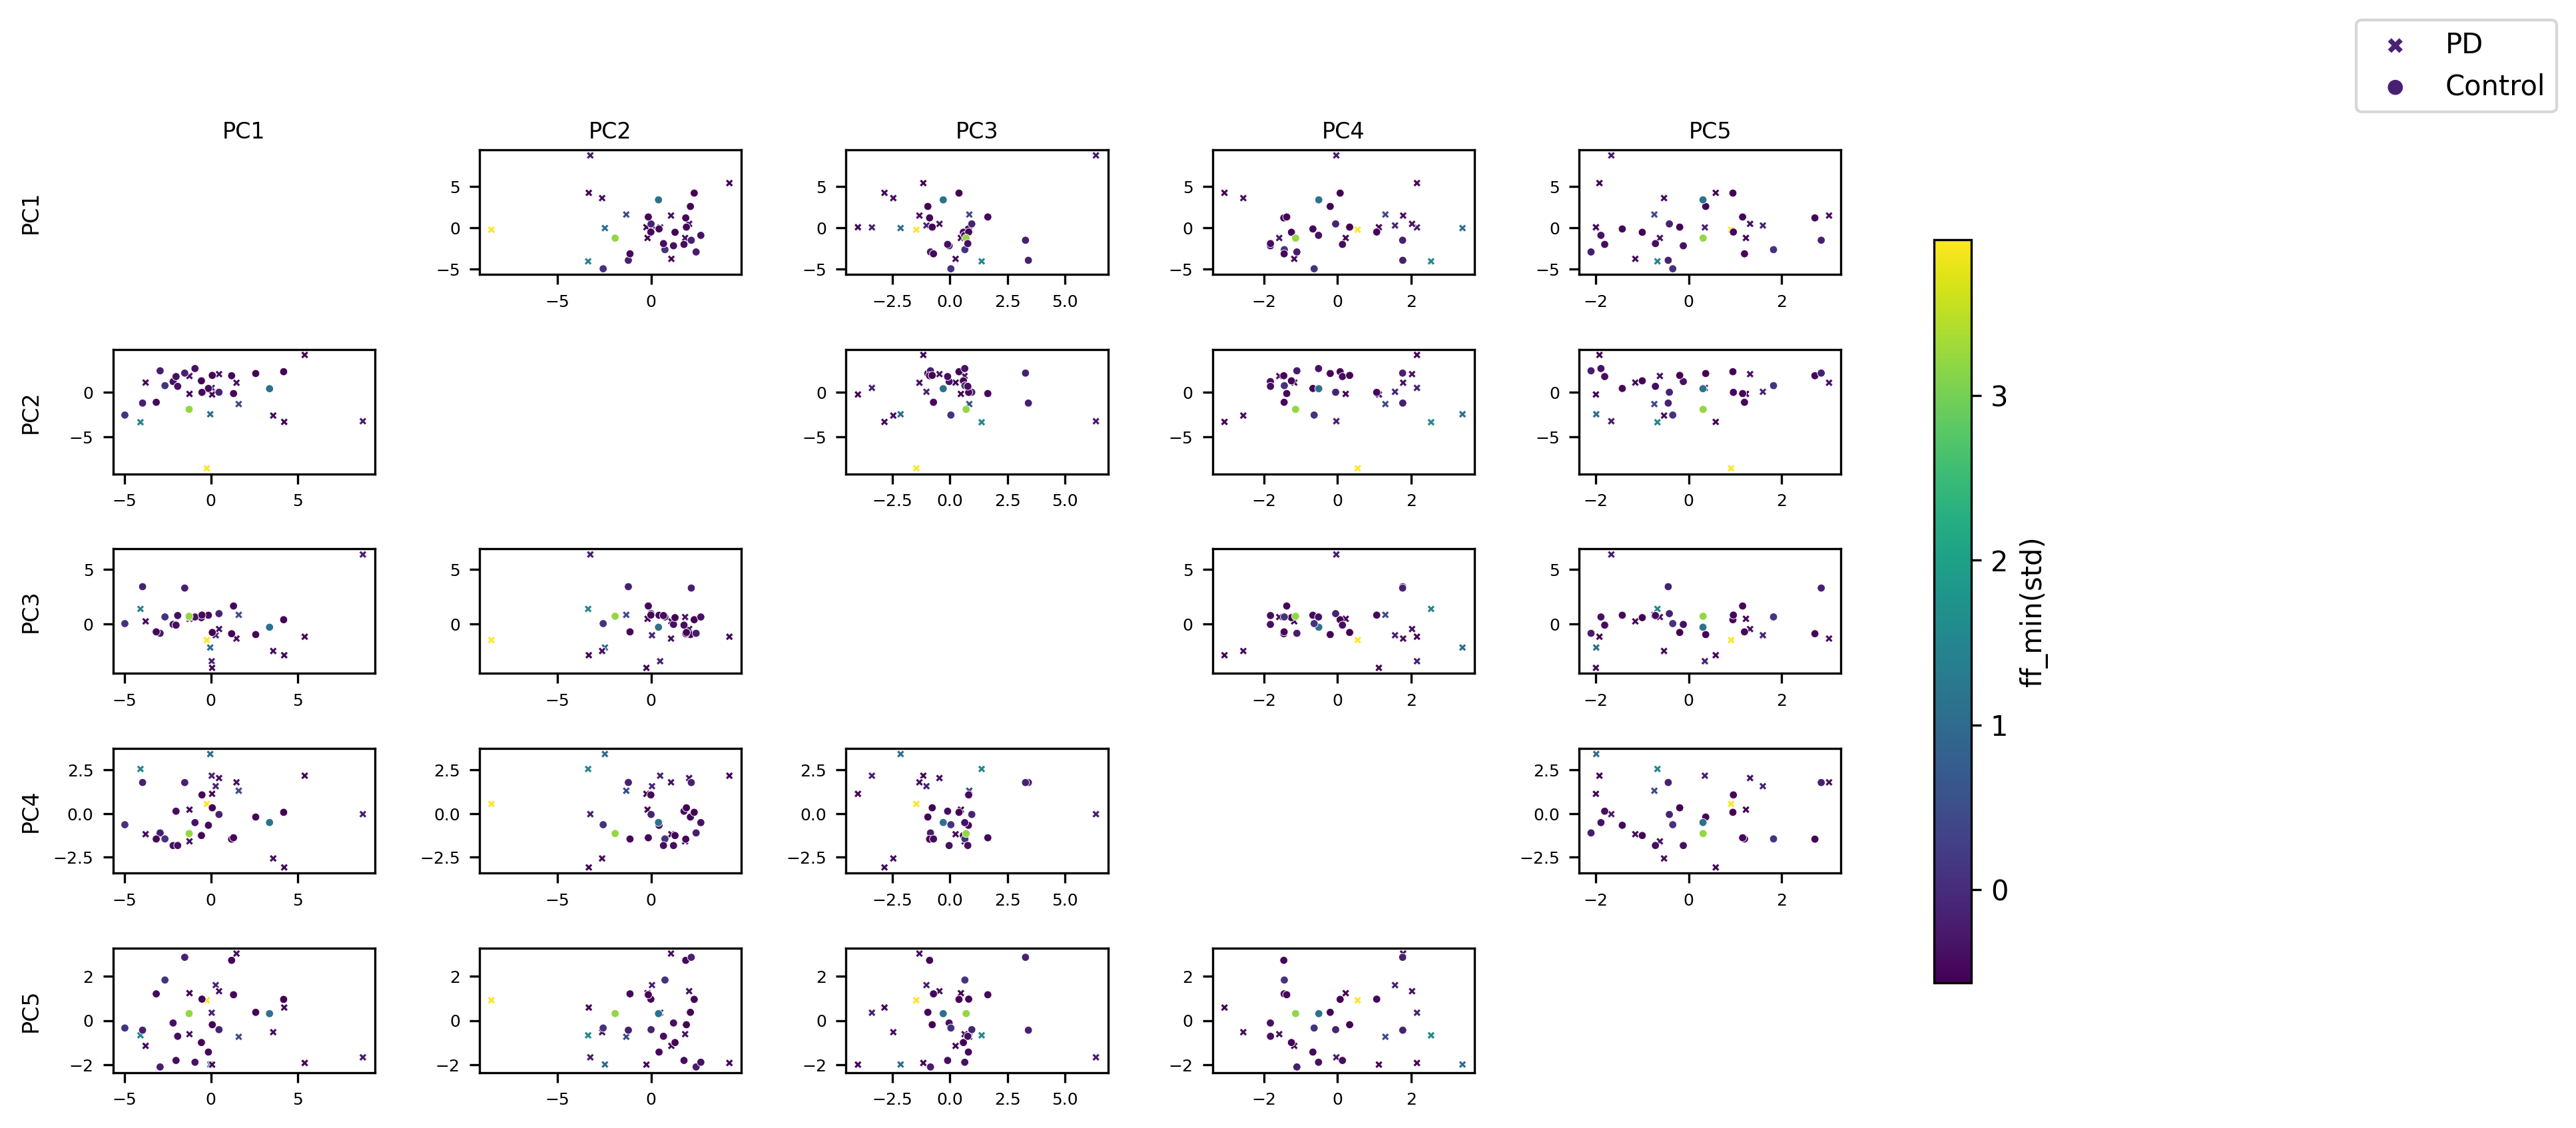

In [81]:
dataset = "ALL"

normalize_merged = merged_df.copy()

PD_array = [True if "pd" in x else False for x in normalize_merged.index]

for col in normalize_merged.columns:
    normalize_merged[col] = (normalize_merged[col] - normalize_merged[col].mean()) / normalize_merged[col].std()
pca = PCA()
pca.fit(normalize_merged)
data = pca.transform(normalize_merged)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)


f, ax = plt.subplots(figsize=(10,6))
sns.barplot(cumulative_var, ax=ax)
ax.set_title("Cumulative Explained Variance")
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xlabel("Components")
ax.set_ylabel("% Variance")
ax.tick_params(axis='both', labelsize=6)

square_size = 5
param = "ff_min"
pca_f, pca_ax = plt.subplots(square_size,square_size,figsize=(12,6))
pca_f.subplots_adjust(wspace=0.4, hspace=0.6)
norm = mpl.colors.Normalize(vmin=normalize_merged[param].min(), vmax=normalize_merged[param].max())
cmap = mpl.cm.viridis
def plot_pca(i, j, ax):
    if i == j:
        ax.set_facecolor('white')
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        if i == 0:
            ax.set_xlabel(f"PC{j+1}", fontsize=8)
            ax.xaxis.set_label_position("top")
        if j == 0:
            ax.set_ylabel(f"PC{i+1}", fontsize=8)
        return
    if i == 0:
        ax.set_xlabel(f"PC{j+1}", fontsize=8)
        ax.xaxis.set_label_position("top")
    if j == 0:
        ax.set_ylabel(f"PC{i+1}", fontsize=8)
    ax.tick_params(axis='both', labelsize=6)
    
    # Split data by PD status
    pd_mask = np.array(PD_array)
    ctrl_mask = ~pd_mask

    # Plot PD (e.g. circles)
    sns.scatterplot(
        x=data[pd_mask, j], y=data[pd_mask, i],
        ax=ax, c=normalize_merged.iloc[pd_mask][param], cmap=cmap, s=8, norm=norm,
        marker='X', label='PD', legend=False
    )
    # Plot Control (e.g. squares)
    sns.scatterplot(
        x=data[ctrl_mask, j], y=data[ctrl_mask, i],
        ax=ax, c=normalize_merged.iloc[ctrl_mask][param], cmap=cmap, s=8, norm=norm,
        marker='o', label='Control', legend=False
    )
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
pca_f.colorbar(sm, ax=pca_ax, orientation='vertical', fraction=0.02, label= param + "(std)", anchor=(2.1, 0.5))
for i in range(square_size):      # i: row index, PC on y-axis (PCi+1)
    for j in range(square_size):  # j: col index, PC on x-axis (PCj+1)
        plot_pca(i, j, pca_ax[i,j])
        # Store handles and labels from the first subplot that has both groups
for i in range(square_size):
    for j in range(square_size):
        if i != j:
            handles, labels = pca_ax[i, j].get_legend_handles_labels()
            if handles:
                break
    if handles:
        break

# Add a single legend to the figure
pca_f.legend(
    handles, labels,
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    scatterpoints=1,        # Number of marker points in the legend entry
    markerscale=2,          # Scale factor for legend markers (increase for bigger points)
    fontsize=10             # Legend text size
)
pca_f.align_ylabels([pca_ax[:,0]])

    
pca_f.savefig(f'./Plots/{square_size}x{square_size}_{param}_pca_{dataset}.png')




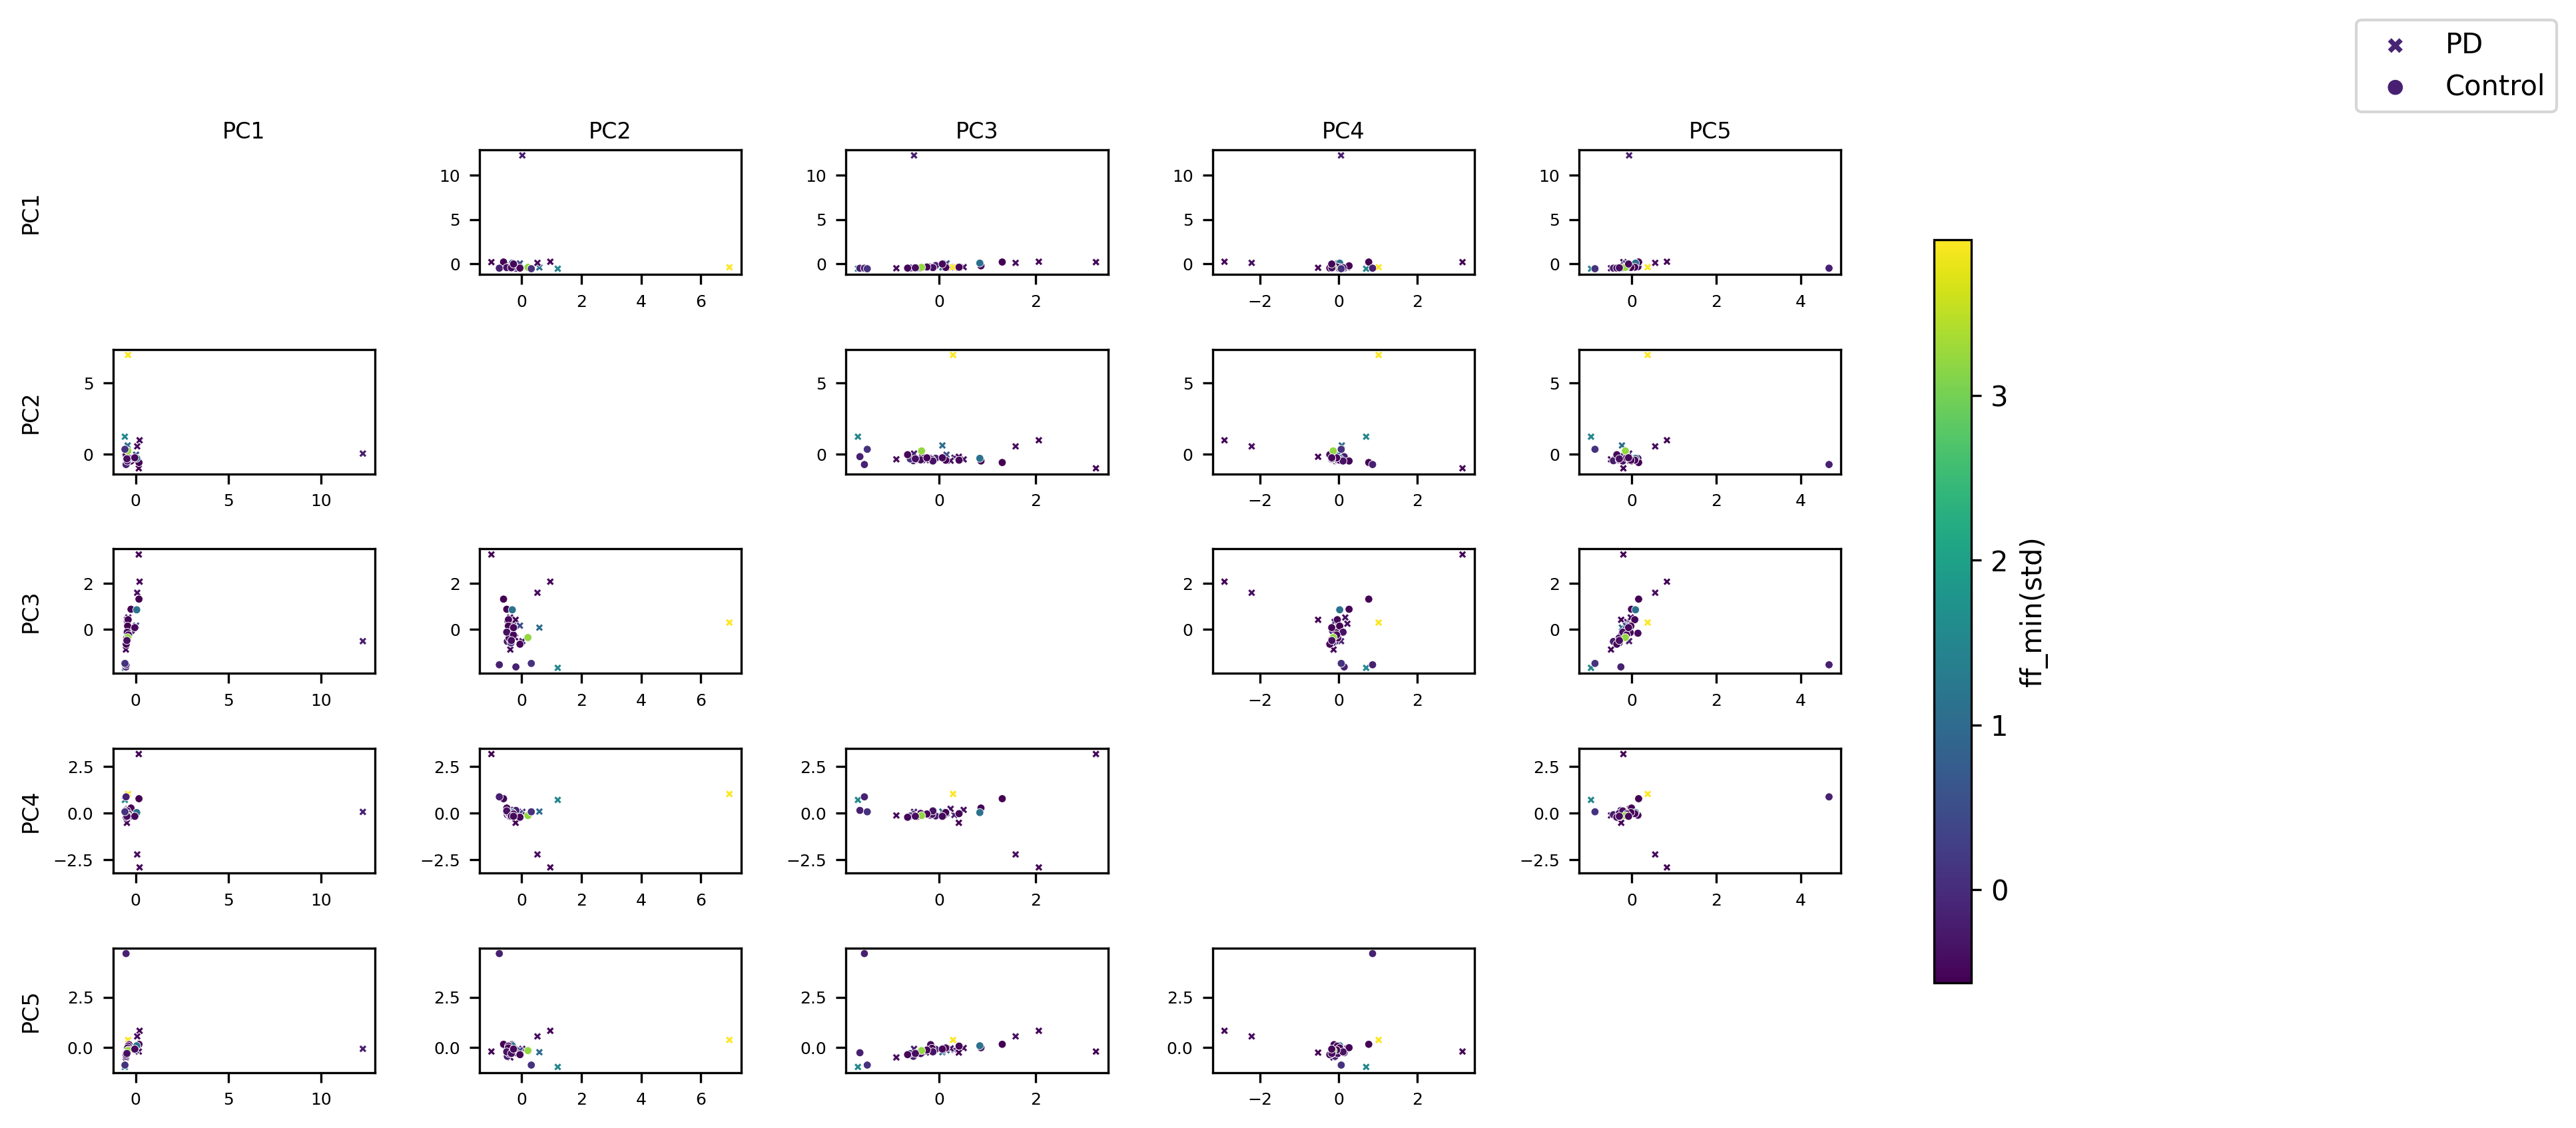

In [82]:

square_size = 5
kernel = "poly"

kernel_pca = KernelPCA(kernel=kernel)
kernel_pca.fit(normalize_merged)
data = kernel_pca.transform(normalize_merged)


kpca_f, kpca_ax = plt.subplots(square_size,square_size,figsize=(12,6))
kpca_f.subplots_adjust(wspace=0.4, hspace=0.6)
norm = mpl.colors.Normalize(vmin=normalize_merged[param].min(), vmax=normalize_merged[param].max())
cmap = mpl.cm.viridis

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
kpca_f.colorbar(sm, ax=kpca_ax, orientation='vertical', fraction=0.02, label= param + "(std)", anchor=(2.1, 0.5))
for i in range(square_size):      # i: row index, PC on y-axis (PCi+1)
    for j in range(square_size):  # j: col index, PC on x-axis (PCj+1)
        plot_pca(i, j, kpca_ax[i,j])
        # Store handles and labels from the first subplot that has both groups
for i in range(square_size):
    for j in range(square_size):
        if i != j:
            handles, labels = kpca_ax[i, j].get_legend_handles_labels()
            if handles:
                break   
    if handles:
        break

# Add a single legend to the figure
kpca_f.legend(
    handles, labels,
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    scatterpoints=1,        # Number of marker points in the legend entry
    markerscale=2,          # Scale factor for legend markers (increase for bigger points)
    fontsize=10             # Legend text size
)
kpca_f.align_ylabels([kpca_ax[:,0]])
kpca_f.savefig(f'./Plots/{square_size}x{square_size}_{param}_kpca_{kernel}_{dataset}.png')
